In [6]:
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../.env", override=True)

True

In [7]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
import uuid

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0
RAG_SYSTEM_PROMPT = """You are an assistant for question-answering tasks.
Answer all the questions asked by the user diligently.
If you don't know the answer, just say that you don't know.
"""

openai_client = OpenAI()
nest_asyncio.apply()

@traceable(run_type="chain")
def generate_response(question: str):
    messages = [
        {
            "role": "system",
            "content": RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Question: {question}"
        }
    ]
    return call_openai(messages)

@traceable(run_type="chain")
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.0
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable(run_type="chain")
def langsmith_rag(question: str):
    response = generate_response(question)
    return response.choices[0].message.content

def chat_bot():
    print("This is a simple chatbot. Type 'exit' to quit.\n")
    
    while True:
        ques = input("Enter the question: ")
        print(f"Question: {ques}")
        
        if ques.lower() == 'exit':
            print("Exiting the chatbot. Goodbye!")
            break
        
        response = langsmith_rag(ques)
        print(f"AI: {response}\n")


chat_bot()

This is a simple chatbot. Type 'exit' to quit.

Question: create a haiku about chess
AI: Silent board awaits,  
Knights leap, bishops slice the air,  
Checkmate whispers fate.

Question: create a haiku about messi
AI: On the field he glides,  
Magic in each deft touch,  
A legend in time.

Question: write an essay on why magnus carlsen is the best chess player to ever exist
AI: **Title: Magnus Carlsen: The Pinnacle of Chess Excellence**

**Introduction**

Chess, a game of strategy, intellect, and foresight, has seen many great players throughout its history. However, few have left as indelible a mark on the game as Magnus Carlsen. Born on November 30, 1990, in Tonsberg, Norway, Carlsen has not only dominated the chess world but has also redefined what it means to be a chess player in the modern era. This essay explores the reasons why Magnus Carlsen is often regarded as the best chess player to ever exist.

**Unprecedented Achievements**

One of the most compelling arguments for Carlse

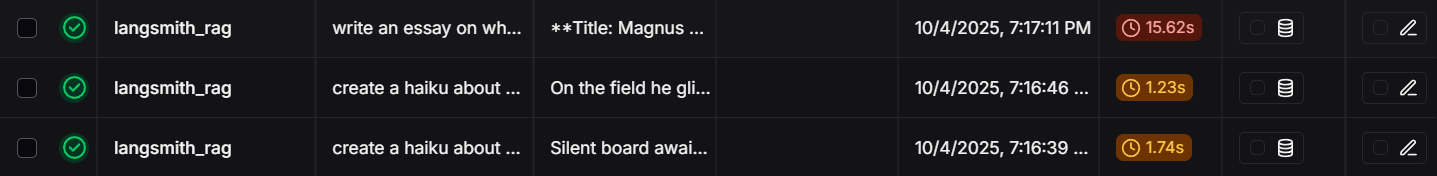

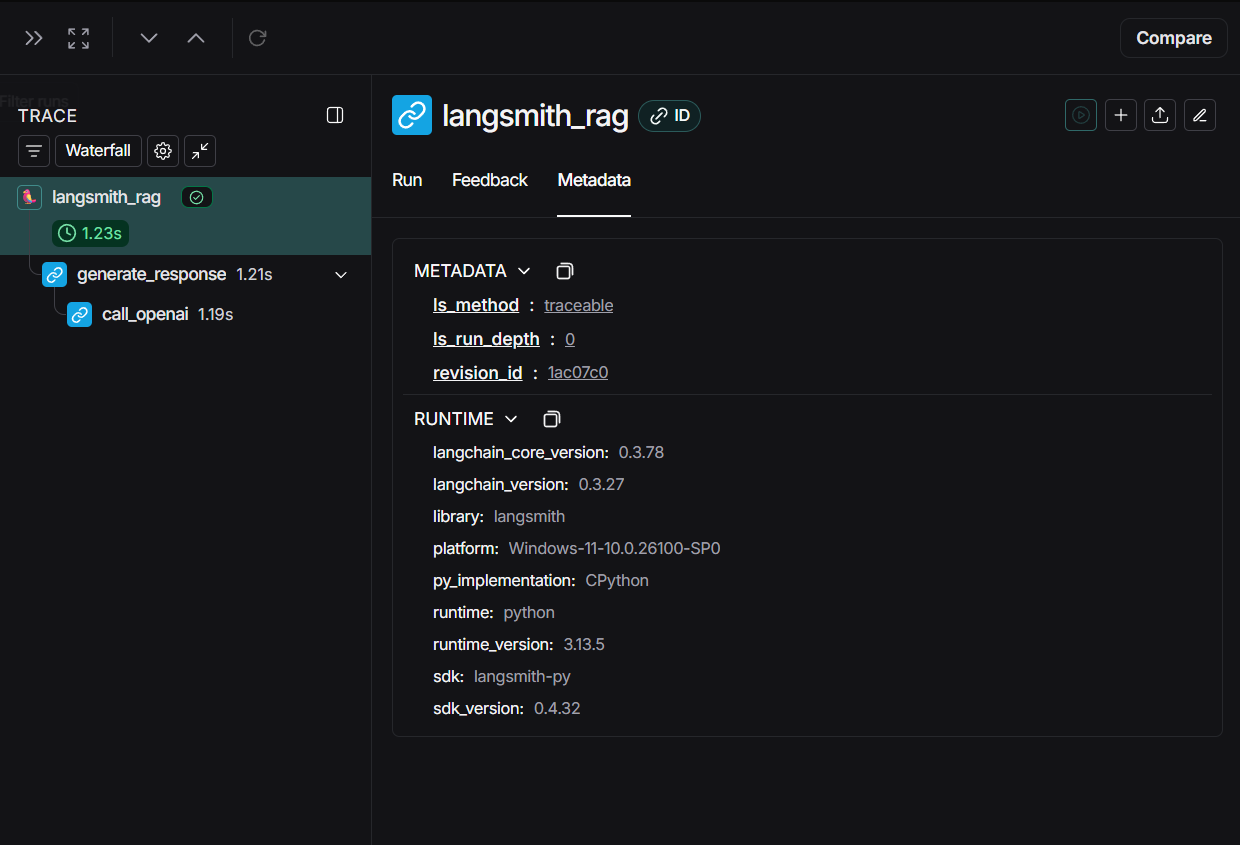

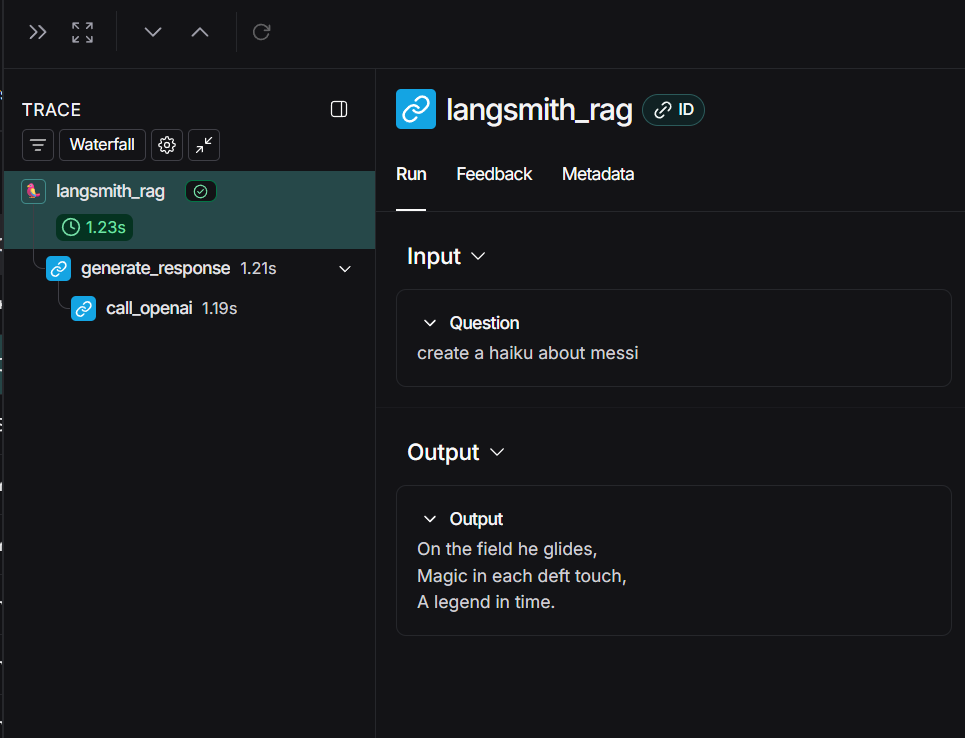